In [1]:
from simsopt import load
from simsopt.field import BiotSavart, Current, coils_via_symmetries, Coil
curves=load('/Users/rogeriojorge/local/microstability_optimization/src/joaquim_circular_coil/circurves_opt.json')
currents = [Current(-1) * 1e5 for c in curves]
coils = [Coil(curv, curr) for (curv, curr) in zip(curves, currents)]
bs = BiotSavart(coils)

[[<mpl_toolkits.mplot3d.art3d.Line3D at 0x2a946c290>],

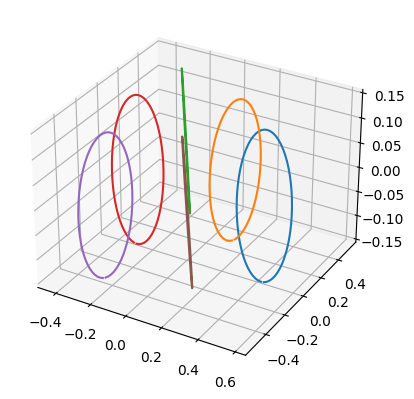

In [2]:
import matplotlib.pyplot as plt
ax = plt.figure().add_subplot(projection='3d')
[ax.plot(coil.curve.gamma()[:,0],coil.curve.gamma()[:,1],coil.curve.gamma()[:,2]) for coil in bs.coils]

In [3]:
import plotly.graph_objects as go
ax = go.Figure()
[ax.add_trace(go.Scatter3d(x=coil.curve.gamma()[:,0], y=coil.curve.gamma()[:,1], z=coil.curve.gamma()[:,2])) for coil in bs.coils]
ax.update_layout(scene_aspectmode="data")
# ax.show()

In [4]:
surf=load('/Users/rogeriojorge/local/microstability_optimization/src/joaquim_circular_coil/qfmsurf_opt.json')

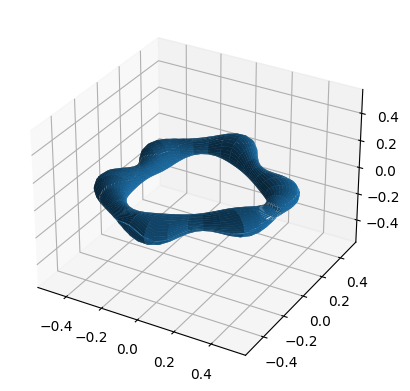

<Axes3D: >

In [5]:
surf.plot()

In [6]:
surf.gamma().shape

(64, 64, 3)

In [45]:
import numpy as np
for i in range(3):
    for j in range(7):
        if np.mod(j,3)!=0: continue
        try:
            print(f'RBC({int(j/3)},{i})={surf.get_rc(i,j)}, ZBS({int(j/3)},{i})={surf.get_zs(i,j)}')
            # print(f'RBS({int(j/3)},{i})={surf.get_rs(i,j)}, ZBC({int(j/3)},{i})={surf.get_zc(i,j)}')
        except: pass

RBC(0,0)=0.3865570882436703, ZBS(0,0)=0.0
RBC(1,0)=0.04768007393223179, ZBS(1,0)=0.023143242778772184
RBC(2,0)=-0.015763003070131922, ZBS(2,0)=0.0003130562315638064
RBC(0,1)=0.06069964852352099, ZBS(0,1)=0.06283953024663201
RBC(1,1)=-0.007070176343884154, ZBS(1,1)=-0.005268186906588749
RBC(2,1)=-0.011097571961310965, ZBS(2,1)=-0.010483981691592354
RBC(0,2)=-0.002068698166328792, ZBS(0,2)=-0.0020811761347722187
RBC(1,2)=0.0003112901442471976, ZBS(1,2)=0.000591923838800934
RBC(2,2)=-0.0003433505597650779, ZBS(2,2)=-0.0005917646626615446
